In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

df_heart_rate= pd.read_csv("/work/data/homework 14/heart_rate.csv")
df_sleep = pd.read_csv("/work/data/homework 14/sleep.csv")
df_activity = pd.read_csv("/work/data/homework 14/activity.csv")

Don't make any classes, follow instructions step-by-step

# Heart rate
`date` - date of the measurement

`time` - time of the measurement (24 hour format)

`heartRate` - heart rate measurement

1. In the following cell, create index with date-time object, such the the final data-frame will have index with date+time and heart rate column.

2. Create 2 new columns with the day_name, and month_name when the event happened.

3. Does it need any other cleaning?

4. Have a look at the time dataframe's index, to see what is the time-step length. Eg, is data taken every hour, every day, every 10 minutes? Now, create a  rolling average column with an appropriate window that you seem fit, based on the time-step you saw.

In [ ]:
df_heart_rate.columns = df_heart_rate.columns.str.lower()
df_heart_rate['period'] = df_heart_rate["date"] + " " + df_heart_rate["time"]
df_heart_rate['period'] = pd.to_datetime(df_heart_rate['period'], format = '%Y-%m-%d %H:%M')
df_heart_rate = df_heart_rate.set_index('period')
df_heart_rate = df_heart_rate.drop(['date','time'],axis = 1)

df_heart_rate ['day_name'] = df_heart_rate.index.day_name()
df_heart_rate ['month_name'] = df_heart_rate.index.month_name()

df_heart_rate["rolling_average"] = df_heart_rate["heartrate"].rolling(window=60).mean()
df_heart_rate['rolling_average'] = df_heart_rate['rolling_average'].fillna(method='backfill')
df_heart_rate.head()

,heartrate,day_name,month_name,rolling_average
period,,,,
2021-02-06 13:28:00,82,Saturday,February,79.383333
2021-02-06 13:29:00,80,Saturday,February,79.383333
2021-02-06 13:30:00,75,Saturday,February,79.383333
2021-02-06 13:31:00,73,Saturday,February,79.383333
2021-02-06 13:32:00,71,Saturday,February,79.383333


---
---
---
# Sleep

`date` - date of the measurement

`lastSyncTime` - when was the data uploaded

`deepSleepTime` - lenght of deep sleep during the sleep, in minutes.

`shallowSleepTime` - lenght of shallow sleep during the sleep, in minutes.

`wakeSleepTime` - lenght of wake time during the sleep, in minutes.

`start` - start of the sleep

`stop` - end of the sleep

1. In the following cell convert columns into appropriate datetime format (long numbers stand for UNIX time)

2. Create index with `date`, such that we can tell when the sleep happened.

3. Create a column that stands for the duration of the sleep.

4. Create 2 new columns with the day_name, and month_name when the event happened.

5. Drop unnecessary column.

6. Is there anything else to clean? 

In [ ]:
df_sleep.columns = df_sleep.columns.str.lower()
df_sleep['date'] = pd.to_datetime(df_sleep['date'], format = '%Y-%m-%d %H:%M')
df_sleep = df_sleep.set_index(['date'])

df_sleep['start'] = pd.to_datetime(df_sleep['start'], unit='s')
df_sleep['stop'] = pd.to_datetime(df_sleep['stop'], unit='s')
df_sleep['lastsynctime'] = pd.to_datetime(df_sleep['lastsynctime'], unit='s')

df_sleep["sleep_duration"] = (df_sleep["stop"] - df_sleep["start"]).astype('timedelta64[s]')/60

df_sleep['day_name'] = df_sleep.index.day_name()
df_sleep['month_name'] = df_sleep.index.month_name()
df_sleep = df_sleep.drop(['lastsynctime'],axis = 1)
df_sleep.head()


,deepsleeptime,shallowsleeptime,waketime,start,stop,sleep_duration,day_name,month_name
date,,,,,,,,
2021-02-06,0,0,0,2021-02-05 00:00:00,2021-02-05 00:00:00,0.0,Saturday,February
2021-02-07,57,381,37,2021-02-07 02:52:00,2021-02-07 12:33:00,581.0,Sunday,February
2021-02-08,23,199,1,2021-02-08 02:24:00,2021-02-08 06:46:00,262.0,Monday,February
2021-02-09,54,328,24,2021-02-09 01:06:00,2021-02-09 08:17:00,431.0,Tuesday,February
2021-02-10,47,294,3,2021-02-10 02:26:00,2021-02-10 08:43:00,377.0,Wednesday,February


---
---
---
# Activity
##### Covers activities like run, bike or stationary exercies.

`date` - date of the measurement

`start` - start of the activity

`stop` - end of the activity

`distance` - distance covered during the activity, in meters

`calories` - calories burned during the activity

`steps` - number of steps taken during the activity


1. In the following cell cleate index with `date`.

2. Convert appropriate columns to datetime.

3. Create new column with duration of the activity.

4. Create 2 new columns with the day_name, and month_name when the event happened.

5. Does anything else need cleaning?

In [ ]:
df_activity['date'] = pd.to_datetime(df_activity['date'], format = '%Y-%m-%d')
df_activity['start'] = pd.to_datetime(df_activity['start'], format = '%H:%M')
df_activity['stop'] = pd.to_datetime(df_activity['stop'], errors='ignore', format = '%H:%M')
df_activity['start'] = df_activity['start'].dt.strftime('%H%M').astype(int)
df_activity['stop'] = df_activity['stop'].dt.strftime('%H%M').astype(int)
df_activity['duration'] = df_activity['stop'] - df_activity['start']
# df_activity['duration'] = df_activity['duration'].astype(str) + " min"
df_activity['day_name'] = df_activity['date'].dt.day_name()
df_activity['month_name'] = df_activity['date'].dt.month_name()
df_activity = df_activity.set_index(['date'])

df_activity.head()

,start,stop,distance,calories,steps,duration,day_name,month_name
date,,,,,,,,
2021-02-06,1450,1514,106,4,156,64,Saturday,February
2021-02-06,1953,1957,56,2,82,4,Saturday,February
2021-02-06,2057,2121,95,4,140,64,Saturday,February
2021-02-07,1347,1403,1469,105,1873,56,Sunday,February
2021-02-07,1404,1448,778,70,1135,44,Sunday,February


---
---
---
# Heart rate

Plot the heartrate on a line plot.

`clearly label the graph, including axis names, title, legend`

Text(0, 0.5, 'Date')

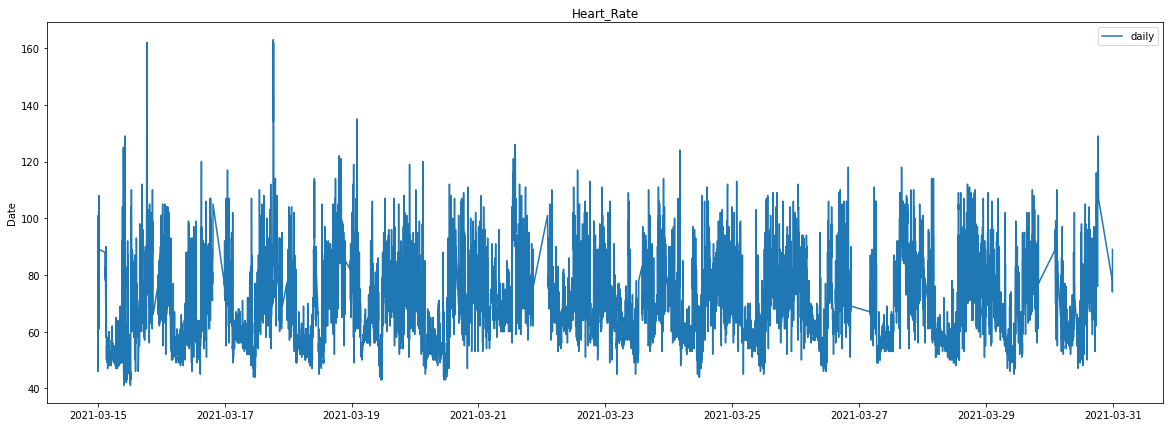

In [ ]:
fig, ax = plt.subplots(figsize = (20,7))
dF_filtered = df_heart_rate.loc["2021-03-15" : "2021-03-30"] 

sns.lineplot(data=df_filtered,
            x=df_filtered.index,
            y="heartrate",
            label="daily")

ax.set_title('Heart_Rate')
ax.set_xlabel('')
ax.set_ylabel("Date")

Plot the heartrate on a line plot.

Plot rolling average of the heartrate on the same graph. 

`clearly label the graph, including axis names, title, legend`

Text(0, 0.5, 'Rolling_Average')

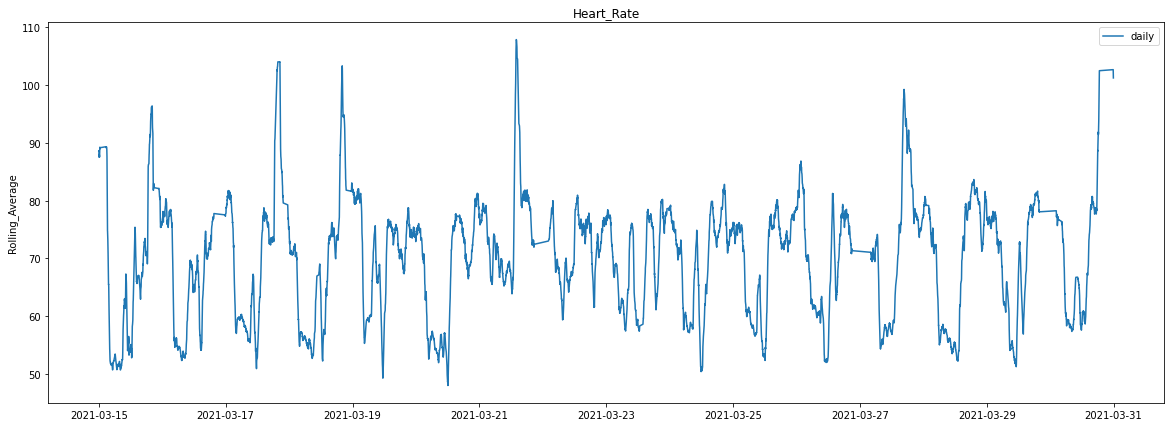

In [ ]:
fig, ax = plt.subplots(figsize = (20,7))
df_filtered = df_heart_rate.loc["2021-03-15" : "2021-03-30"] 

sns.lineplot(data=df_filtered,
            x=df_filtered.index,
            y="rolling_average",
            label="daily")

ax.set_title('Heart_Rate')
ax.set_xlabel('')
ax.set_ylabel("Rolling_Average")

Plot histogram of all the heart rate values.

<AxesSubplot:xlabel='heartrate', ylabel='Count'>

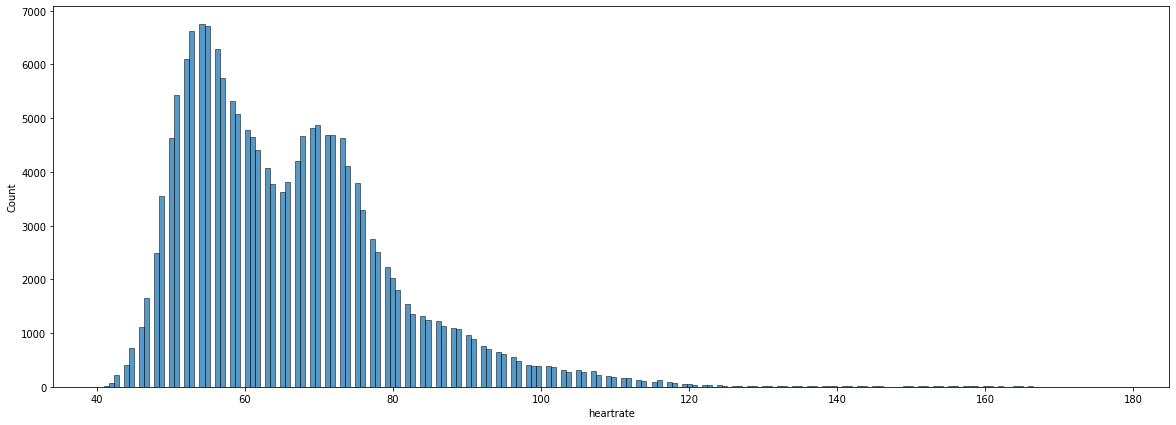

In [ ]:
fig, ax = plt.subplots(figsize = (20,7))


sns.histplot(data=df_heart_rate,
            x="heartrate",
            label="daily")

Create a plot that show min, average, max values of heart rate, for every day of the week (boxplot)

<AxesSubplot:xlabel='day_name', ylabel='heartrate'>

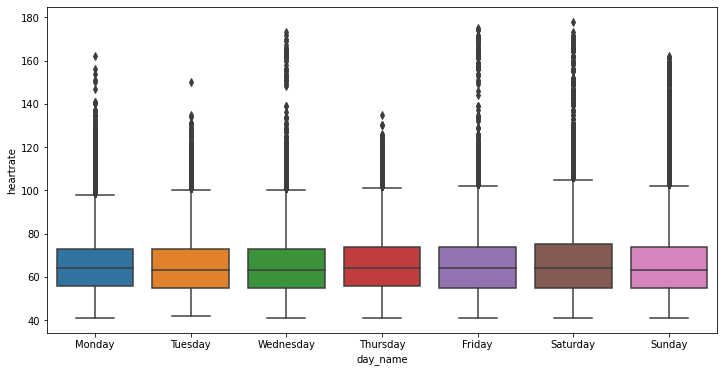

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_heart_rate,
            x = "day_name",
            y = "heartrate",
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'])

In [ ]:
df_filtered = df_heart_rate[df_heart_rate["heartrate"] > 100]

<AxesSubplot:xlabel='day_name', ylabel='heartrate'>

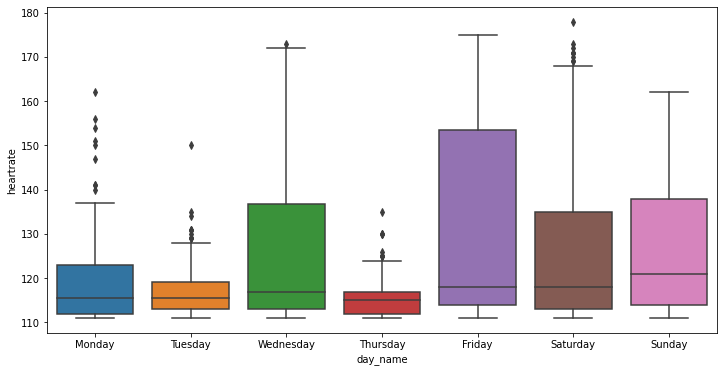

In [ ]:
plt.figure(figsize=(12,6))
df_filtered = df_heart_rate[df_heart_rate["heartrate"] > 110]

sns.boxplot(data=df_filtered,
            x = "day_name",
            y = "heartrate",
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'])

Create a plot that show min, average, max values of heart rate, for every month (boxplot)

<AxesSubplot:xlabel='month_name', ylabel='heartrate'>

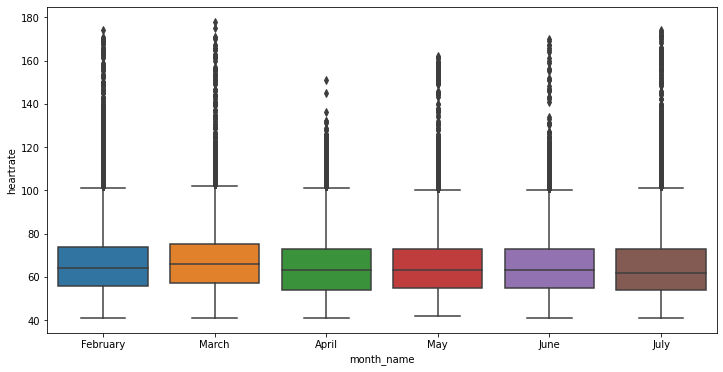

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_heart_rate,
            x = "month_name",
            y = "heartrate",
            order=["February", "March", "April", 'May', 'June', 'July'])

<AxesSubplot:xlabel='month_name', ylabel='heartrate'>

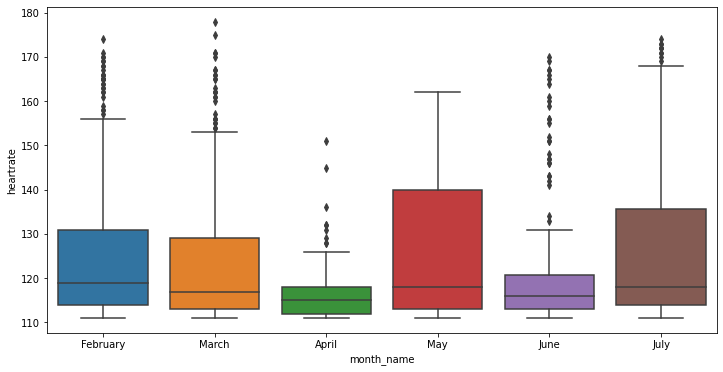

In [ ]:
plt.figure(figsize=(12,6))
df_filtered = df_heart_rate[df_heart_rate["heartrate"] > 110]

sns.boxplot(data=df_filtered,
            x = "month_name",
            y = "heartrate",
            order=["February", "March", "April", 'May', 'June', 'July'])

Create a new column in the `df_heartrate`, called `heart_rate_zone`. 

Based on the heart rate measurement, every row will have one of the following values `"sleep", "relaxed", "light", "intensive", "aerobic", "anaerobic", "VO2 MAX"`

Based on the histogram above, you decide what are heart-rate ranges will be associated with these values.

In [ ]:
def create_heart_rate_zone(heart):
    if heart < 40:
        return "danger"
    elif  40 < heart <= 60:
        return "sleep"
    elif  60 < heart <= 80:
        return "relaxed"
    elif  80 < heart <= 100:
        return "light"
    elif  100 < heart <= 120:
        return "intensive"
    elif  120 < heart <= 140:
        return "aerobic"
    elif  140 < heart <= 170:
        return "anaerobic"
    elif  170 < heart:
        return "VO2 MAX"

df_heart_rate["heart_rate_zone"] = df_heart_rate["heartrate"].apply(create_heart_rate_zone)

Create a graph so that we can see the number of all `heart_rate_zone` values.

<AxesSubplot:xlabel='heart_rate_zone', ylabel='count'>

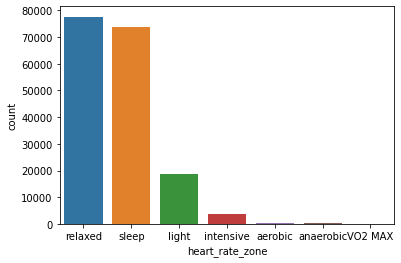

In [ ]:
sns.countplot(data=df_heart_rate,
              x="heart_rate_zone",
              order=df_heart_rate["heart_rate_zone"].value_counts().sort_values(ascending=False).index
)snss

Pick a month worth of data - up to you which one.

Create a graph that will show the min, average, max values of the heart rate for every single day.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='number_of_day', ylabel='heartrate'>

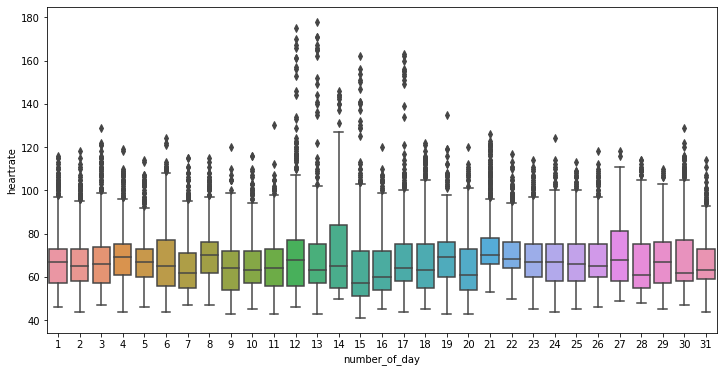

In [ ]:
plt.figure(figsize=(12,6))

df_filtered = df_heart_rate.loc["2021-3"]
df_filtered["number_of_day"] =df_filtered.index.day

sns.boxplot(data= df_filtered,
            x= "number_of_day",
            y= "heartrate")

---
---
---

# Sleep


Create a plot to show how much deep sleep, shallow sleep, and wake up time happened overall

<AxesSubplot:>

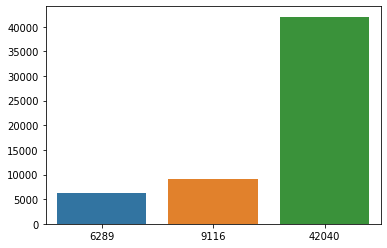

In [ ]:
df_temporary = df_sleep[["deepsleeptime", "shallowsleeptime", "waketime"]].sum()

sns.barplot(data=df_temporary,
            x=df_temporary.index,
            y=df_temporary.values)

1. What is the overall duration spent sleeping?

2. Over how many days?

In [ ]:
total_sleep_duration = df_sleep["sleep_duration"].sum()/60
total_sleep_duration

1126.3166666666666

In [ ]:
diff = (df_sleep.index.max()- df_sleep.index.min())
total_time = diff.days*24
total_time

4200

In [ ]:
round((total_sleep_duration / total_time)*100, 2)

26.82

Plot a histogram of all the times when sleep started

Plot another histogram onto the same graph with different color, of all the times when sleep ended

Make sure the x-axis starts at 0 (midnight) and ents at 24 (midnight)

Create a boxplot of all fall-asleep and wake-up times.

Create a plot showing min, average, max value of sleep duration.

Create a plot showing min, average, max value of sleep duration, for every day of the week.

Create a plot showing min, average, max value of sleep duration, for every month.

---
---
---

# Activity

Do whatever you think can be done!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>